# AI Project for SWE 485

In [383]:
#%%
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean 
from pandas.core.arrays.categorical import contains



In [384]:
iris =pd.read_csv('water_potability.csv')

In [385]:
# To print the first five datasets
iris.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [386]:
iris.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

1998


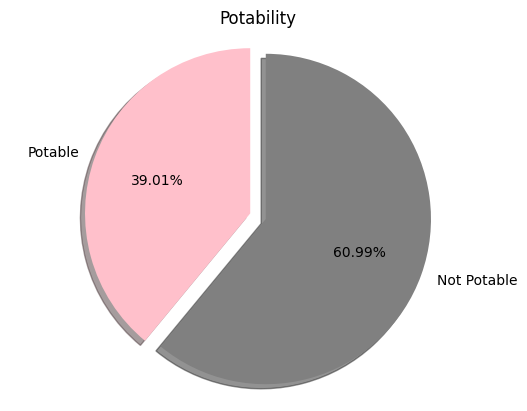

In [387]:
labels= ['Potable', 'Not Potable']
colors=['pink', 'gray']

Potable=iris['Potability']
NumOfPotable=0
NumOfNotPotable=0


for x in Potable:
    if x==1:
        NumOfPotable+=1

    else:
        NumOfNotPotable+=1

sizes= [NumOfPotable, NumOfNotPotable]
print(NumOfNotPotable)
plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.1, 0 ), autopct='%1.2f%%')

plt.title('Potability')

plt.axis('equal')

plt.show()

<BarContainer object of 2 artists>

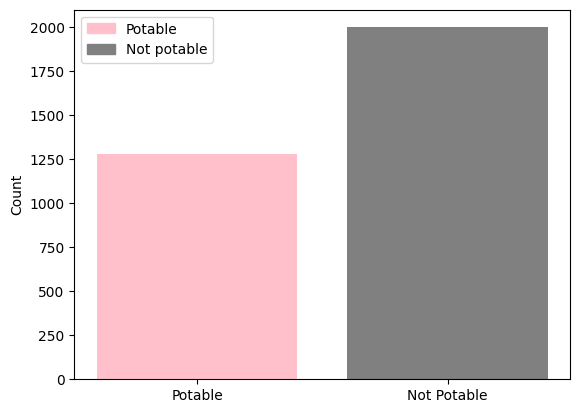

In [388]:

chart = { 'Potable' : NumOfPotable, 'Not Potable' : NumOfNotPotable}
label = list(chart.keys())
value = list(chart.values())
colors = {'Potable':'pink', 'Not potable':'gray'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)


plt.ylabel('Count')

plt.bar(label, value,color=['pink', 'gray'])

nan


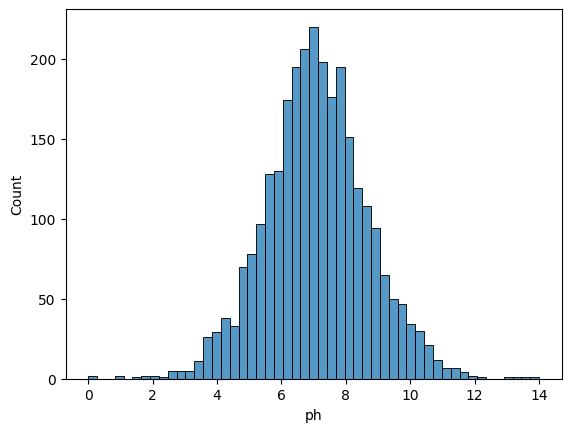

In [389]:
sns.histplot(x='ph',data=iris)
list_avg = mean(iris['ph'])
print(list_avg)
plt.show()

196.36949601730154


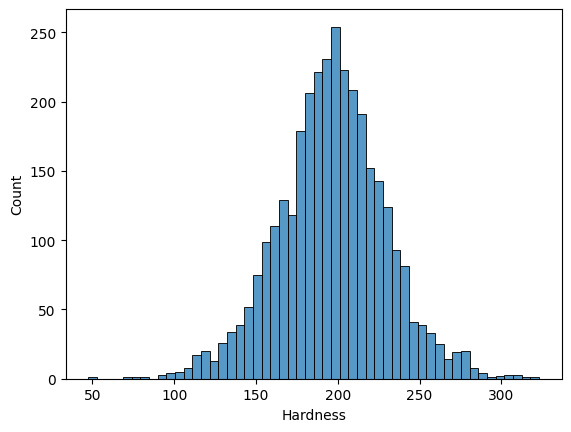

In [390]:
sns.histplot(x='Hardness',data=iris)
list_avg = mean(iris['Hardness']) 
print(list_avg)
plt.show()

22014.092526077104


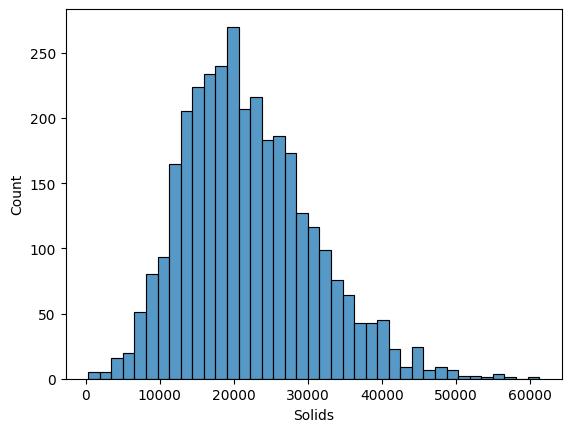

In [391]:
sns.histplot(x='Solids',data=iris)
#,hue='Potability'
list_avg = mean(iris['Solids']) 
print(list_avg)
plt.show()

7.122276793425787


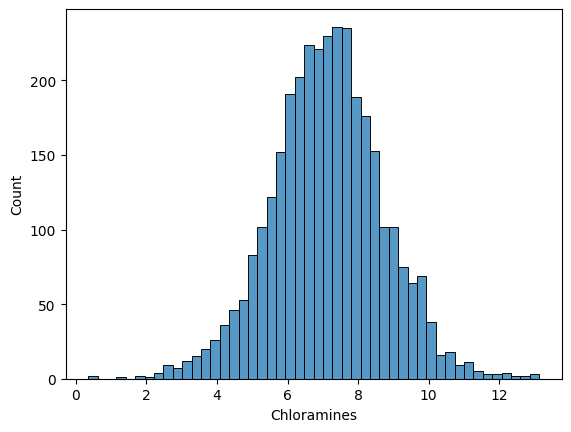

In [392]:
sns.histplot(x='Chloramines',data=iris)
list_avg = mean(iris['Chloramines']) 
print(list_avg)
plt.show()

333.22467188905864


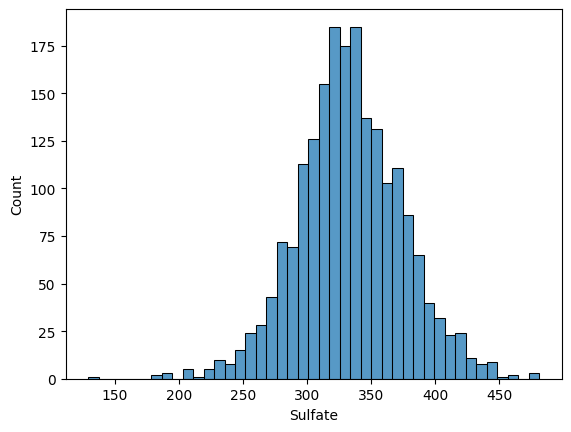

In [399]:
#iris.dropna(inplace=True)
sns.histplot(x='Sulfate',data=iris)
list_avg = mean(iris['Sulfate']) 
print(list_avg)
plt.show()

426.20511068255325


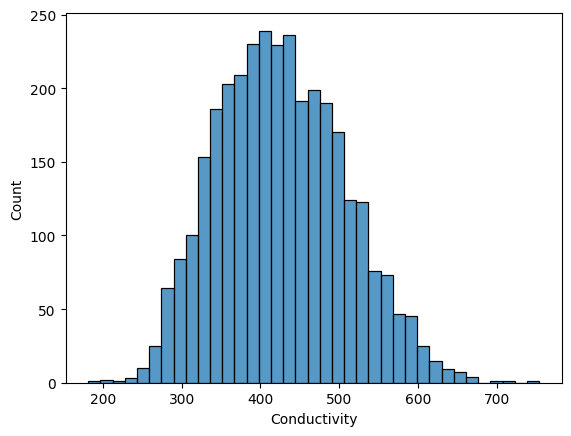

In [394]:
sns.histplot(x='Conductivity',data=iris)
list_avg = mean(iris['Conductivity']) 
print(list_avg)
plt.show()

14.284970247677318


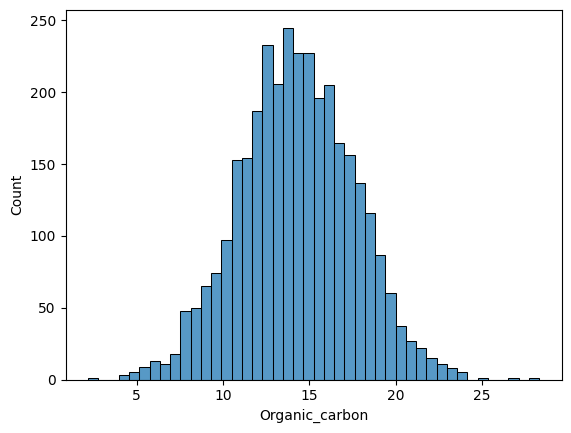

In [395]:
sns.histplot(x='Organic_carbon',data=iris)
list_avg = mean(iris['Organic_carbon']) 
print(list_avg)
plt.show()

66.40085936726278


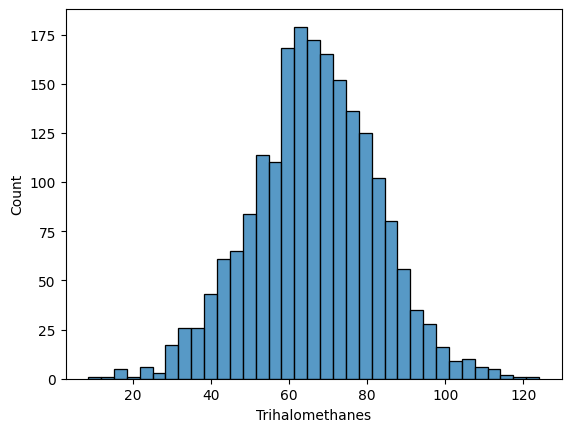

In [402]:
#iris.dropna(inplace=True)
sns.histplot(x='Trihalomethanes',data=iris)
list_avg = mean(iris['Trihalomethanes']) 
print(list_avg)
plt.show()

3.9667861697910585


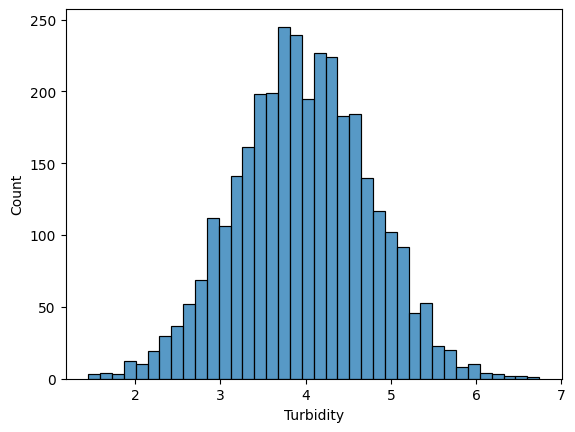

In [397]:
sns.histplot(x='Turbidity',data=iris)
list_avg = mean(iris['Turbidity']) 
print(list_avg)
plt.show()